<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Multilabel_car_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d julichitai/multilabel-small-car-and-color-dataset

100% 241M/241M [00:02<00:00, 118MB/s] 
100% 241M/241M [00:02<00:00, 96.7MB/s]


In [5]:
import zipfile
zip = zipfile.ZipFile("/content/multilabel-small-car-and-color-dataset.zip",'r')
zip.extractall("/content/multilabel-small-car-and-color")
zip.close()

In [6]:
directory=os.path.join('/content/multilabel-small-car-and-color')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,  # Example: random rotation
    width_shift_range=0.2,  # Example: random horizontal shift
    height_shift_range=0.2,  # Example: random vertical shift
    shear_range=0.2,  # Example: random shear
    zoom_range=0.2,  # Example: random zoom
    horizontal_flip=True,  # Example: random horizontal flip
    fill_mode='nearest'  # Example: how to fill missing pixels
)

In [8]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 2191 images belonging to 9 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 544 images belonging to 9 classes.


In [10]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

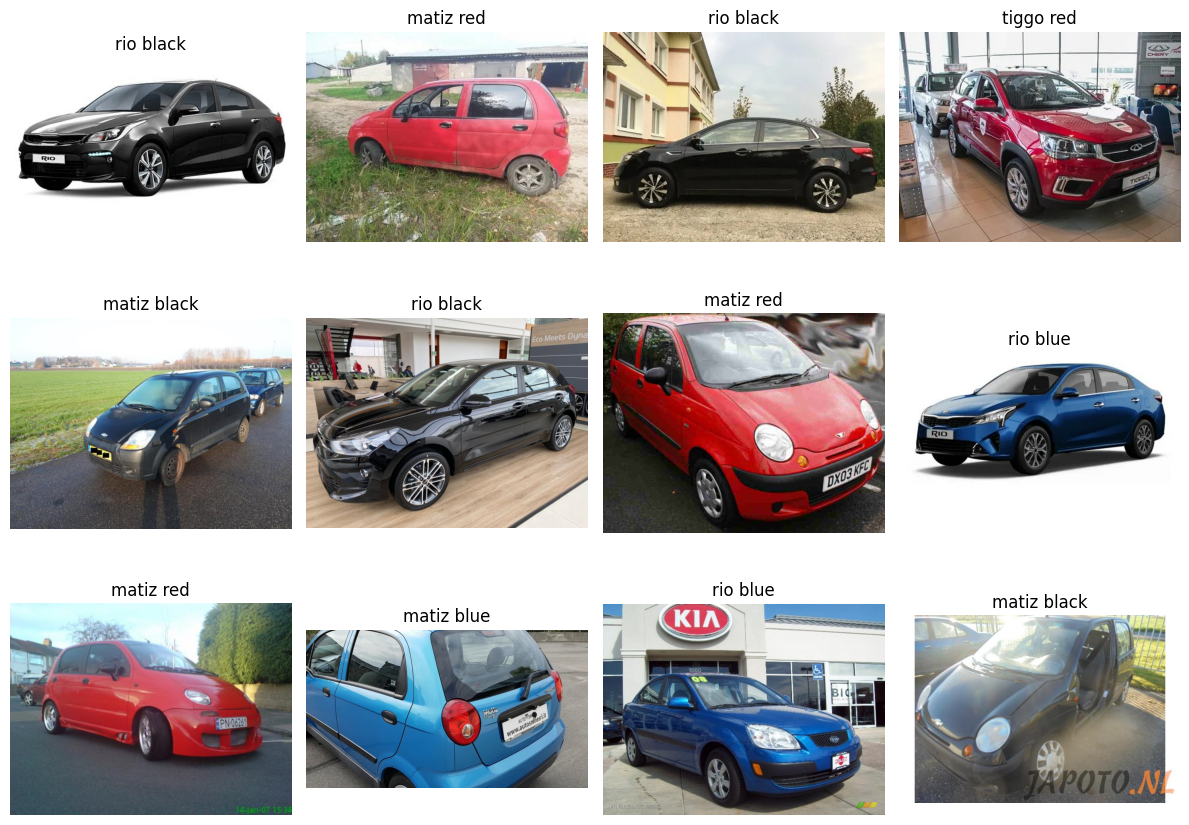

In [11]:
import random
from PIL import Image


filenames = train_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = directory + "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### **Now lets start creating CNN Network**

In [ ]:
# Initializing the first CNN model
model1 = tf.keras.Sequential()

# Creating the CNN model
model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.1))

# The third convolution
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model1.add(Flatten())

# 512 neuron hidden layer
model1.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model1.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

In [ ]:
model1.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_generator,validation_data=validation_generator,epochs=50,batch_size=64)

Epoch 1/50
69/69 [==============================] - 81s 966ms/step - loss: 2.4992 - accuracy: 0.2246 - val_loss: 1.4668 - val_accuracy: 0.4118
Epoch 2/50
69/69 [==============================] - 59s 856ms/step - loss: 1.3603 - accuracy: 0.3989 - val_loss: 1.2073 - val_accuracy: 0.4357
Epoch 3/50
69/69 [==============================] - 60s 867ms/step - loss: 1.2475 - accuracy: 0.4491 - val_loss: 1.2294 - val_accuracy: 0.4614
Epoch 4/50
69/69 [==============================] - 59s 854ms/step - loss: 1.1669 - accuracy: 0.4733 - val_loss: 1.1677 - val_accuracy: 0.5055
Epoch 5/50
69/69 [==============================] - 58s 841ms/step - loss: 1.1211 - accuracy: 0.5139 - val_loss: 1.0333 - val_accuracy: 0.5129
Epoch 6/50
69/69 [==============================] - 58s 844ms/step - loss: 1.0692 - accuracy: 0.5395 - val_loss: 1.0761 - val_accuracy: 0.5276
Epoch 7/50
69/69 [==============================] - 59s 855ms/step - loss: 1.0698 - accuracy: 0.5208 - val_loss: 0.9165 - val_accuracy: 0.6140

In [ ]:
loss,acc=model1.evaluate(validation_generator)
print("Model1's Accuracy:-",acc)
print("Model1's Loss:-",loss)

17/17 [==============================] - 14s 808ms/step - loss: 0.7230 - accuracy: 0.6875
Model1's Accuracy:- 0.6875
Model1's Loss:- 0.7229668498039246


In [ ]:
import matplotlib.pyplot as plt

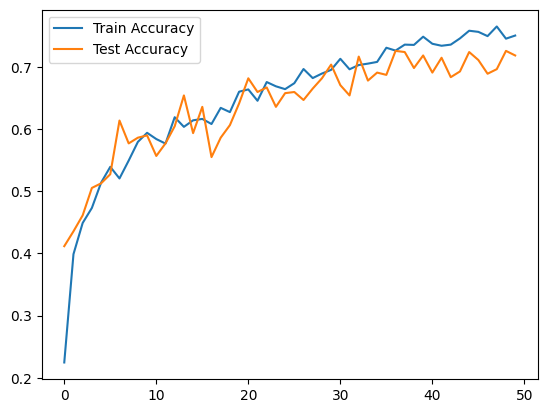

In [ ]:
plt.plot(history1.history['accuracy'],label="Train Accuracy")
plt.plot(history1.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.show()

In [ ]:
# Initializing the first CNN model
model2 = tf.keras.Sequential()

# Creating the CNN model
model2.add(Conv2D(228, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model2.add(Conv2D(144, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.1))

# The third convolution
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model2.add(Flatten())

# 512 neuron hidden layer
model2.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model2.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 228)     6384      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 126, 126, 228)     0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 228)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 144)     295632    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 144)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 144)      

In [ ]:
model2.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=50)

Epoch 1/50
69/69 [==============================] - 89s 1s/step - loss: 1.8706 - accuracy: 0.2880 - val_loss: 1.3361 - val_accuracy: 0.3805
Epoch 2/50
69/69 [==============================] - 79s 1s/step - loss: 1.3201 - accuracy: 0.3898 - val_loss: 1.2212 - val_accuracy: 0.4228
Epoch 3/50
69/69 [==============================] - 78s 1s/step - loss: 1.2762 - accuracy: 0.3971 - val_loss: 1.2281 - val_accuracy: 0.3897
Epoch 4/50
69/69 [==============================] - 77s 1s/step - loss: 1.2241 - accuracy: 0.4340 - val_loss: 1.1215 - val_accuracy: 0.4724
Epoch 5/50
69/69 [==============================] - 78s 1s/step - loss: 1.1912 - accuracy: 0.4701 - val_loss: 1.1293 - val_accuracy: 0.4926
Epoch 6/50
69/69 [==============================] - 77s 1s/step - loss: 1.1308 - accuracy: 0.4760 - val_loss: 1.0429 - val_accuracy: 0.5110
Epoch 7/50
69/69 [==============================] - 77s 1s/step - loss: 1.1157 - accuracy: 0.5021 - val_loss: 1.0983 - val_accuracy: 0.5037
Epoch 8/50
69/69 [==

In [ ]:
loss2,acc2=model2.evaluate(validation_generator)
print("Model 2 loss:-",loss2)
print("Model 2 Accuracy:-",acc2)

17/17 [==============================] - 24s 1s/step - loss: 0.7083 - accuracy: 0.7151
Model 2 loss:- 0.7083001136779785
Model 2 Accuracy:- 0.7150735259056091


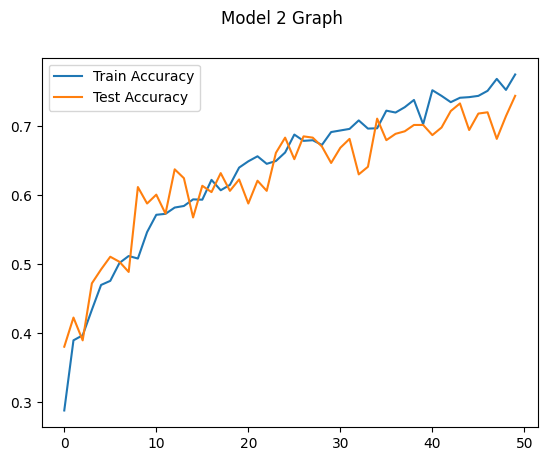

In [ ]:
plt.plot(history2.history['accuracy'],label="Train Accuracy")
plt.plot(history2.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.suptitle("Model 2 Graph")
plt.show()

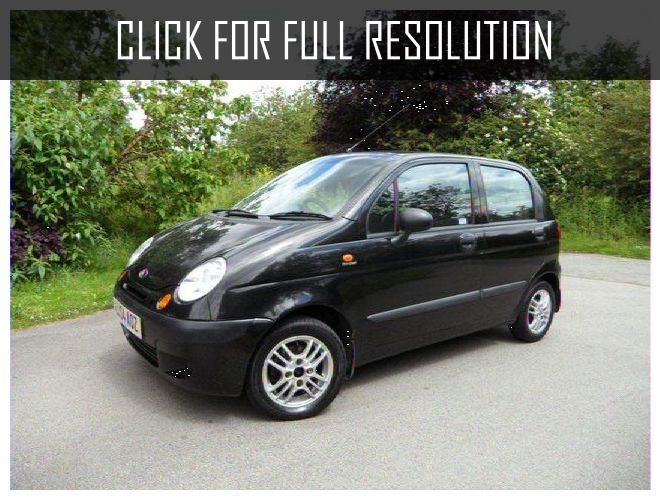

In [ ]:
testing_1=Image.open("/content/multilabel-small-car-and-color/matiz black/000001.jpg")
testing_1

In [ ]:
resized_img=testing_1.resize((255,255))

In [ ]:
targeted_img=keras.preprocessing.image.img_to_array(resized_img)

In [ ]:
targeted_img = np.expand_dims(targeted_img, axis=0)

In [ ]:
model2.predict(targeted_img)

1/1 [==============================] - 0s 483ms/step


array([[1.160743e-13, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00]], dtype=float32)

In [ ]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

## Implementing the Pre-Trained CNN models

#### **Implementation of ResNet Pretrained Model**

In [ ]:
from keras import applications

In [ ]:
ResNet=applications.ResNet50(include_top=False,weights="imagenet")

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
train_generator.image_shape

(255, 255, 3)

In [ ]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(200, 200),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 2191 images belonging to 9 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(200, 200),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 544 images belonging to 9 classes.


In [ ]:
# Create a custom top layer for your specific task
ResNetModel = Sequential()
ResNetModel.add(ResNet)
ResNetModel.add(keras.layers.GlobalAveragePooling2D())
ResNetModel.add(Dense(256, activation='relu'))
ResNetModel.add(Dense(9, activation='softmax'))  # Adjust the number of output classes

In [ ]:
ResNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 24114569 (91.99 MB)
Trainable params: 24061449 (91.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
ResNetModel.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy'])

In [ ]:
history3=ResNetModel.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=50)

Epoch 1/50
69/69 [==============================] - 92s 715ms/step - loss: 1.3217 - accuracy: 0.5299 - val_loss: 8.5808 - val_accuracy: 0.1048
Epoch 2/50
69/69 [==============================] - 47s 687ms/step - loss: 0.7426 - accuracy: 0.7152 - val_loss: 2.3715 - val_accuracy: 0.1048
Epoch 3/50
69/69 [==============================] - 48s 698ms/step - loss: 0.6771 - accuracy: 0.7398 - val_loss: 9.2215 - val_accuracy: 0.1581
Epoch 4/50
69/69 [==============================] - 49s 704ms/step - loss: 0.5835 - accuracy: 0.7882 - val_loss: 2.4339 - val_accuracy: 0.1121
Epoch 5/50
69/69 [==============================] - 47s 676ms/step - loss: 0.4753 - accuracy: 0.8247 - val_loss: 2.7885 - val_accuracy: 0.1048
Epoch 6/50
69/69 [==============================] - 48s 695ms/step - loss: 0.4674 - accuracy: 0.8416 - val_loss: 2.4192 - val_accuracy: 0.1268
Epoch 7/50
69/69 [==============================] - 48s 691ms/step - loss: 0.4772 - accuracy: 0.8252 - val_loss: 3.0984 - val_accuracy: 0.1066

In [ ]:
loss,acc=ResNetModel.evaluate(validation_generator)

17/17 [==============================] - 11s 634ms/step - loss: 0.3471 - accuracy: 0.9026


In [ ]:
print(f"Loss of ResNet Model:- {loss}")
print(f"Accuracy of ResNet Model:- {acc}")

Loss of ResNet Model:- 0.347101628780365
Accuracy of ResNet Model:- 0.9025735259056091


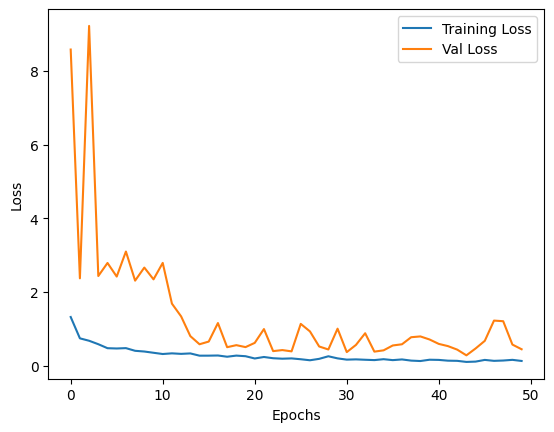

In [ ]:
plt.plot(history3.history['loss'],label="Training Loss")
plt.plot(history3.history['val_loss'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

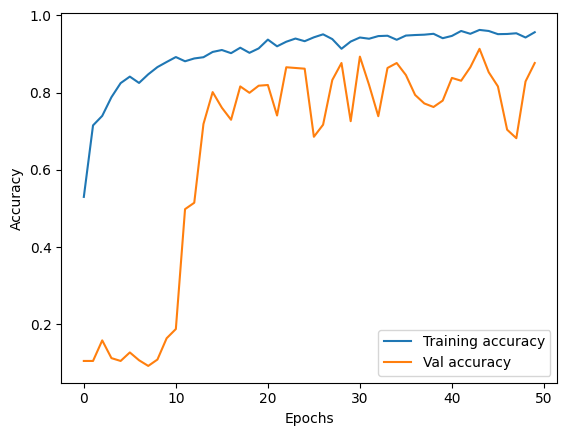

In [ ]:
plt.plot(history3.history['accuracy'],label="Training accuracy")
plt.plot(history3.history['val_accuracy'],label="Val accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

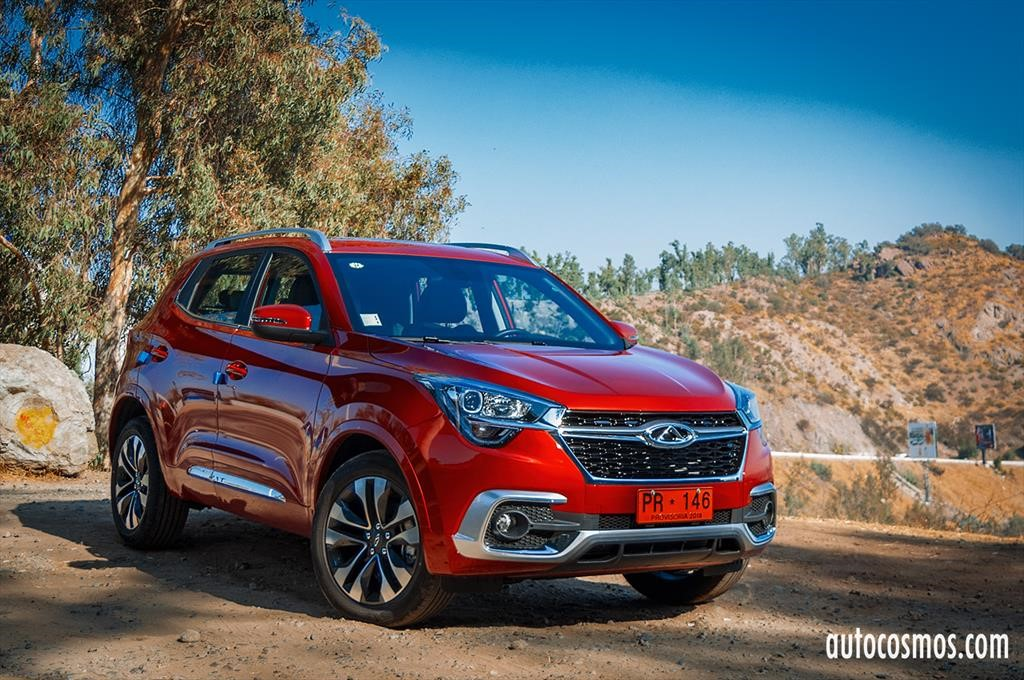

In [ ]:
testing_2=Image.open("/content/multilabel-small-car-and-color/tiggo red/000030.jpg")
testing_2

In [ ]:
resized_img=testing_2.resize((200,200))
pre_img=keras.preprocessing.image.img_to_array(resized_img)
target_img_2=np.expand_dims(pre_img,axis=0)

In [ ]:
ResNetModel.predict(target_img_2)

1/1 [==============================] - 2s 2s/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

#### **Implementation of VGG16 Pretrained Model**

In [ ]:
vgg16_base = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 2191 images belonging to 9 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 544 images belonging to 9 classes.


In [ ]:
VGG16Model = Sequential()

# Add the VGG16 base model
VGG16Model.add(vgg16_base)

# Add MaxPooling and Dropout
VGG16Model.add(keras.layers.GlobalAveragePooling2D())
VGG16Model.add(keras.layers.Dropout(0.3))

# Flatten and add Dense layers
VGG16Model.add(Flatten())
VGG16Model.add(Dense(256, activation='relu'))

# Output layer for multi-class classification
VGG16Model.add(Dense(9, activation='softmax'))  # Adjust the number of output classes

In [ ]:
VGG16Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 9)                 2313      
                                                      

In [ ]:
VGG16Model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy'])

In [ ]:
history4=VGG16Model.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=10)

Epoch 1/10
69/69 [==============================] - 61s 832ms/step - loss: 2.1937 - accuracy: 0.1387 - val_loss: 2.1558 - val_accuracy: 0.1581
Epoch 2/10
69/69 [==============================] - 57s 818ms/step - loss: 1.9246 - accuracy: 0.2095 - val_loss: 1.6001 - val_accuracy: 0.2206
Epoch 3/10
69/69 [==============================] - 56s 809ms/step - loss: 1.6448 - accuracy: 0.2875 - val_loss: 1.5356 - val_accuracy: 0.2868
Epoch 4/10
69/69 [==============================] - 57s 824ms/step - loss: 1.4792 - accuracy: 0.3419 - val_loss: 1.2730 - val_accuracy: 0.3456
Epoch 5/10
69/69 [==============================] - 57s 830ms/step - loss: 1.3280 - accuracy: 0.3615 - val_loss: 1.2563 - val_accuracy: 0.3585
Epoch 6/10
69/69 [==============================] - 57s 813ms/step - loss: 1.2759 - accuracy: 0.3816 - val_loss: 1.1424 - val_accuracy: 0.4890
Epoch 7/10
69/69 [==============================] - 56s 808ms/step - loss: 1.2425 - accuracy: 0.4153 - val_loss: 1.1887 - val_accuracy: 0.4504

In [ ]:
loss,acc=VGG16Model.evaluate(validation_generator)

17/17 [==============================] - 12s 694ms/step - loss: 0.9888 - accuracy: 0.5827


In [ ]:
print(f"Loss of VGG16 Model:- {loss}")
print(f"Accuracy of VGG16 Model:- {acc}")

Loss of VGG16 Model:- 0.9887990355491638
Accuracy of VGG16 Model:- 0.5827205777168274


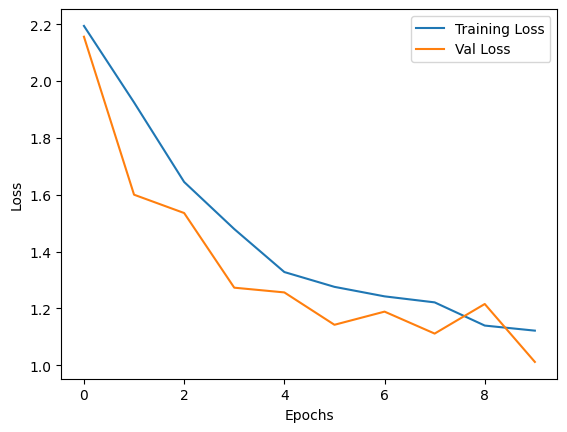

In [ ]:
plt.plot(history4.history['loss'],label="Training Loss")
plt.plot(history4.history['val_loss'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

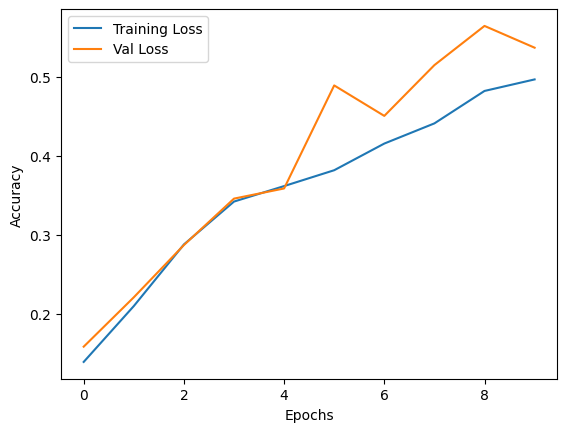

In [ ]:
plt.plot(history4.history['accuracy'],label="Training Loss")
plt.plot(history4.history['val_accuracy'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### **Implementation of InceptionV3 Pretrained Model**

In [12]:
InceptionV3_base=keras.applications.InceptionV3(include_top=False,weights="imagenet",input_shape=(299,299,3))

87910968/87910968 [==============================] - 0s 0us/step


In [13]:
InceptionV3Model = Sequential()

# Add the VGG16 base model
InceptionV3Model.add(InceptionV3_base)

# Add MaxPooling and Dropout
InceptionV3Model.add(keras.layers.GlobalAveragePooling2D())
InceptionV3Model.add(keras.layers.Dropout(0.3))

# Flatten and add Dense layers
InceptionV3Model.add(Flatten())
InceptionV3Model.add(Dense(256, activation='relu'))

# Output layer for multi-class classification
InceptionV3Model.add(Dense(9, activation='softmax'))  # Adjust the number of output classes

In [14]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(299, 299),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)


validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(299, 299),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 2191 images belonging to 9 classes.
Found 544 images belonging to 9 classes.


In [15]:
InceptionV3Model.compile(loss='categorical_crossentropy',
                         optimizer="adam",
                         metrics=['accuracy'])

In [16]:
history5=InceptionV3Model.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=25)

Epoch 1/25
69/69 [==============================] - 135s 1s/step - loss: 1.0294 - accuracy: 0.6353 - val_loss: 52.3907 - val_accuracy: 0.1360
Epoch 2/25
69/69 [==============================] - 83s 1s/step - loss: 0.5644 - accuracy: 0.8083 - val_loss: 6.9785 - val_accuracy: 0.3621
Epoch 3/25
69/69 [==============================] - 81s 1s/step - loss: 0.5020 - accuracy: 0.8453 - val_loss: 1.9774 - val_accuracy: 0.5221
Epoch 4/25
69/69 [==============================] - 82s 1s/step - loss: 0.4402 - accuracy: 0.8530 - val_loss: 1.1811 - val_accuracy: 0.7353
Epoch 5/25
69/69 [==============================] - 80s 1s/step - loss: 0.4024 - accuracy: 0.8663 - val_loss: 1.7707 - val_accuracy: 0.6379
Epoch 6/25
69/69 [==============================] - 82s 1s/step - loss: 0.3135 - accuracy: 0.8987 - val_loss: 1.0353 - val_accuracy: 0.7592
Epoch 7/25
69/69 [==============================] - 81s 1s/step - loss: 0.3171 - accuracy: 0.8877 - val_loss: 0.7911 - val_accuracy: 0.7849
Epoch 8/25
69/69 [

In [18]:
loss,acc=InceptionV3Model.evaluate(validation_generator)

17/17 [==============================] - 17s 1s/step - loss: 0.3305 - accuracy: 0.8952


In [19]:
print(f"Loss of VGG16 Model:- {loss}")
print(f"Accuracy of VGG16 Model:- {acc}")

Loss of VGG16 Model:- 0.330460786819458
Accuracy of VGG16 Model:- 0.8952205777168274


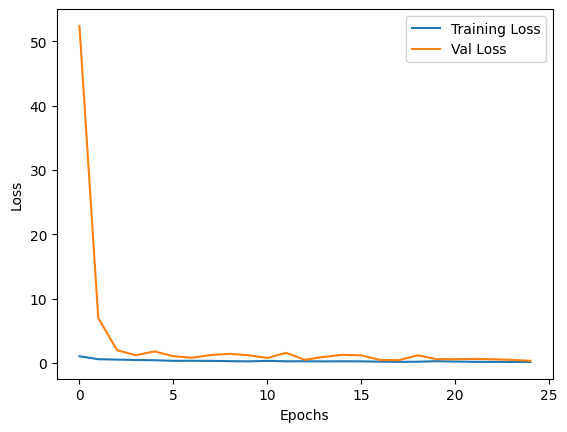

In [20]:
plt.plot(history5.history['loss'],label="Training Loss")
plt.plot(history5.history['val_loss'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

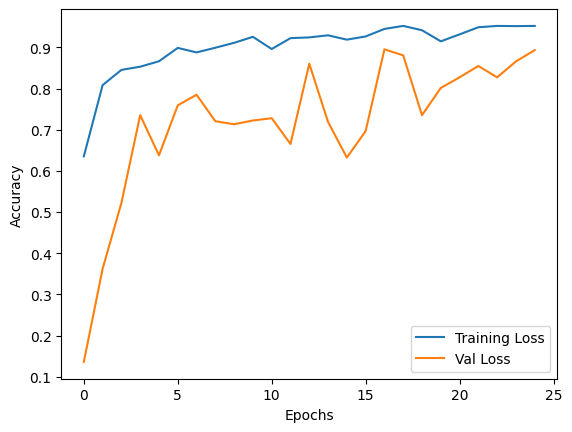

In [21]:
plt.plot(history5.history['accuracy'],label="Training Loss")
plt.plot(history5.history['val_accuracy'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

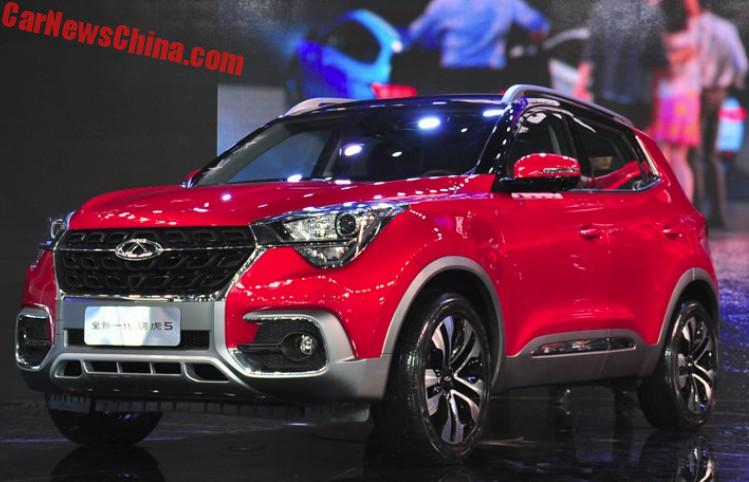

In [27]:
testing_2=Image.open("/content/multilabel-small-car-and-color/tiggo red/000050.jpg")
testing_2

In [28]:
resized_img=testing_2.resize((299,299))
pre_img=keras.preprocessing.image.img_to_array(resized_img)
target_img_2=np.expand_dims(pre_img,axis=0)

In [29]:
InceptionV3Model.predict(target_img_2)

1/1 [==============================] - 0s 45ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

#### **Implementation of DenseNet121 Pretrained Model**

In [33]:
DenseNet121_base=keras.applications.DenseNet121(include_top=False,weights="imagenet",input_shape=(224,224,3))

In [34]:
DenseNet121Model = Sequential()

# Add the VGG16 base model
DenseNet121Model.add(DenseNet121_base)

# Add MaxPooling and Dropout
DenseNet121Model.add(keras.layers.GlobalAveragePooling2D())
DenseNet121Model.add(keras.layers.Dropout(0.3))

# Flatten and add Dense layers
DenseNet121Model.add(Flatten())
DenseNet121Model.add(Dense(256, activation='relu'))

# Output layer for multi-class classification
DenseNet121Model.add(Dense(9, activation='softmax'))  # Adjust the number of output classes

In [35]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)


validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(224, 224),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 2191 images belonging to 9 classes.
Found 544 images belonging to 9 classes.


In [36]:
DenseNet121Model.compile(loss="categorical_crossentropy",
                         optimizer="adam",
                         metrics=['accuracy'])

In [37]:
DenseNet121Model.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=25)

Epoch 1/25
69/69 [==============================] - 126s 888ms/step - loss: 1.0549 - accuracy: 0.6184 - val_loss: 10.5961 - val_accuracy: 0.2482
Epoch 2/25
69/69 [==============================] - 54s 783ms/step - loss: 0.5556 - accuracy: 0.8033 - val_loss: 1.9248 - val_accuracy: 0.5478
Epoch 3/25
69/69 [==============================] - 64s 926ms/step - loss: 0.4427 - accuracy: 0.8613 - val_loss: 1.9398 - val_accuracy: 0.5588
Epoch 4/25
69/69 [==============================] - 54s 788ms/step - loss: 0.4166 - accuracy: 0.8553 - val_loss: 1.4793 - val_accuracy: 0.6820
Epoch 5/25
69/69 [==============================] - 53s 770ms/step - loss: 0.3199 - accuracy: 0.8877 - val_loss: 1.3653 - val_accuracy: 0.6783
Epoch 6/25
69/69 [==============================] - 53s 765ms/step - loss: 0.3143 - accuracy: 0.8982 - val_loss: 0.4874 - val_accuracy: 0.8438
Epoch 7/25
69/69 [==============================] - 54s 770ms/step - loss: 0.2978 - accuracy: 0.8991 - val_loss: 1.7688 - val_accuracy: 0.67

In [46]:
loss,acc=DenseNet121Model.evaluate(validation_generator)

17/17 [==============================] - 12s 700ms/step - loss: 0.7157 - accuracy: 0.8401


In [47]:
print(f"Loss of DenseNet121 Model:- {loss}")
print(f"Accuracy of DenseNet121 Model:- {acc}")

Loss of DenseNet121 Model:- 0.7156940698623657
Accuracy of DenseNet121 Model:- 0.8400735259056091


#### **Implementation of EfficientNet-B0 Pretrained Model**

In [57]:
EfficientNet_base=keras.applications.EfficientNetB0(include_top=False,weights="imagenet",input_shape=(224,224,3))

In [58]:
EfficientNetModel = Sequential()

# Add the VGG16 base model
EfficientNetModel.add(DenseNet121_base)

# Add MaxPooling and Dropout
EfficientNetModel.add(keras.layers.GlobalAveragePooling2D())
EfficientNetModel.add(keras.layers.Dropout(0.3))

# Flatten and add Dense layers
EfficientNetModel.add(Flatten())
EfficientNetModel.add(Dense(256, activation='relu'))

# Output layer for multi-class classification
EfficientNetModel.add(Dense(9, activation='softmax'))  # Adjust the number of output classes

In [59]:
EfficientNetModel.compile(loss="categorical_crossentropy",
                          optimizer="adam",
                          metrics=['accuracy'])

In [60]:
history7=EfficientNetModel.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=10)

Epoch 1/10
69/69 [==============================] - 120s 960ms/step - loss: 0.3472 - accuracy: 0.9000 - val_loss: 3.8293 - val_accuracy: 0.6618
Epoch 2/10
69/69 [==============================] - 56s 806ms/step - loss: 0.1962 - accuracy: 0.9439 - val_loss: 0.6850 - val_accuracy: 0.8603
Epoch 3/10
69/69 [==============================] - 54s 786ms/step - loss: 0.2501 - accuracy: 0.9169 - val_loss: 0.7791 - val_accuracy: 0.8162
Epoch 4/10
69/69 [==============================] - 54s 783ms/step - loss: 0.2294 - accuracy: 0.9343 - val_loss: 0.5183 - val_accuracy: 0.8603
Epoch 5/10
69/69 [==============================] - 54s 795ms/step - loss: 0.1503 - accuracy: 0.9521 - val_loss: 0.3914 - val_accuracy: 0.8971
Epoch 6/10
69/69 [==============================] - 55s 801ms/step - loss: 0.1436 - accuracy: 0.9580 - val_loss: 0.4419 - val_accuracy: 0.8934
Epoch 7/10
69/69 [==============================] - 53s 772ms/step - loss: 0.1799 - accuracy: 0.9484 - val_loss: 1.0080 - val_accuracy: 0.788

In [61]:
loss,acc=EfficientNetModel.evaluate(validation_generator)

17/17 [==============================] - 12s 709ms/step - loss: 0.5186 - accuracy: 0.8621


In [62]:
print(f"Loss of VGG16 Model:- {loss}")
print(f"Accuracy of VGG16 Model:- {acc}")

Loss of VGG16 Model:- 0.5186142921447754
Accuracy of VGG16 Model:- 0.8621323704719543


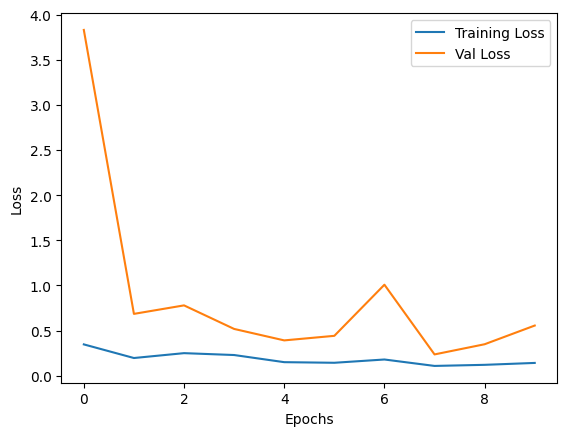

In [63]:
plt.plot(history7.history['loss'],label="Training Loss")
plt.plot(history7.history['val_loss'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

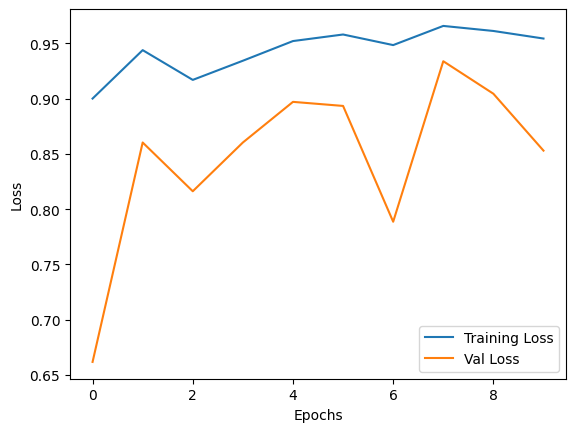

In [65]:
plt.plot(history7.history['accuracy'],label="Training Loss")
plt.plot(history7.history['val_accuracy'],label="Val Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### **as we can see like above predict we got impressive because almost correct only**

##### GitHub Link:- https://github.com/rkgupta7463/ML-projects-code/blob/decc2e350b9a72c8ae7f2d8fc5cc133499fe32f7/Multilabel_car_Classifications.ipynb